# Load data into Spark DataFrame

In [1]:
from pyspark import SparkContext

In [2]:
import pyspark.sql.functions as F

In [3]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [4]:
df = spark.read.csv('../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [5]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551430|    P| 1179220|2017-03-30|
|168548942|    P| 4112522|2017-03-30|
|168548099|    P| 4984002|2017-03-30|
|168550576|    P|  324249|2017-03-30|
|168551383|    P| 7149583|2017-03-30|
|168551113|    P| 6491838|2017-03-30|
|168551186|    P| 3045674|2017-03-30|
|168551016|    P| 5642585|2017-03-30|
|168549948|    P|23082492|2017-03-30|
|168548426|    P| 1012999|2017-03-30|
|168550597|    P|  126530|2017-03-30|
|168550329|    P| 3514083|2017-03-30|
|168551016|    P| 6216256|2017-03-30|
|168551233|    P|23491654|2017-03-30|
|168546317|    P| 7186129|2017-03-30|
|168551107|    P|23492688|2017-03-30|
|168551286|    P|  625170|2017-03-30|
|168544328|    P| 7183005|2017-03-30|
|168551233|    P| 6749207|2017-03-30|
|168548099|    P|  720366|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [6]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [7]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551430|    P| 1179220|2017-03-30|
|168548942|    P| 4112522|2017-03-30|
|168548099|    P| 4984002|2017-03-30|
|168550576|    P|  324249|2017-03-30|
|168551383|    P| 7149583|2017-03-30|
|168551113|    P| 6491838|2017-03-30|
|168551186|    P| 3045674|2017-03-30|
|168551016|    P| 5642585|2017-03-30|
|168549948|    P|23082492|2017-03-30|
|168548426|    P| 1012999|2017-03-30|
|168550597|    P|  126530|2017-03-30|
|168550329|    P| 3514083|2017-03-30|
|168551016|    P| 6216256|2017-03-30|
|168551233|    P|23491654|2017-03-30|
|168546317|    P| 7186129|2017-03-30|
|168551107|    P|23492688|2017-03-30|
|168551286|    P|  625170|2017-03-30|
|168544328|    P| 7183005|2017-03-30|
|168551233|    P| 6749207|2017-03-30|
|168548099|    P|  720366|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Data exploration

In [8]:
# simple count rows
df.count()

12185961

In [9]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59494

In [10]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  621880|
|    S|  760101|
|    P|10803980|
+-----+--------+



In [11]:
# another way to group by aggregation (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid'),
    F.min(F.col('uid')).alias('min_uid')
).show()

+-----+--------+--------+---------+
|event|   count| max_uid|  min_uid|
+-----+--------+--------+---------+
|    D|  621880|98902555|100087237|
|    S|  760101|98902555|100362850|
|    P|10803980|99331872|100071797|
+-----+--------+--------+---------+



In [12]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 34065|
|2017-04-01|    P|484658|
|2017-04-01|    S| 31791|
|2017-04-02|    D| 27795|
|2017-04-02|    P|448832|
|2017-04-02|    S| 30868|
|2017-04-03|    D| 23218|
|2017-04-03|    P|250799|
|2017-04-03|    S| 26089|
|2017-04-04|    D| 18886|
|2017-04-04|    P|368918|
|2017-04-04|    S| 23746|
|2017-04-05|    D| 15688|
|2017-04-05|    P|310161|
|2017-04-05|    S| 20046|
+----------+-----+------+



In [13]:
# count for all events by date
date_count = df.groupBy('date').count().toPandas()
date_count.set_index('date',inplace=True)

(array([736419., 736426., 736433., 736440., 736447., 736454., 736461.]),
 <a list of 7 Text xticklabel objects>)

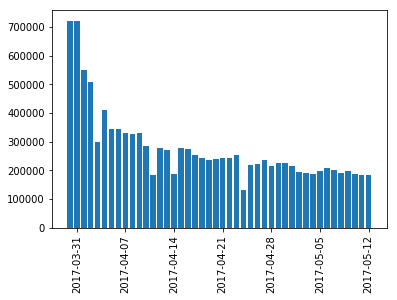

In [14]:
plt.bar(date_count.index,date_count['count'])
plt.xticks(rotation='vertical')

In [15]:
# count for play by date
date_play_count = df.filter(F.col('event')=='P').groupBy('date').count().toPandas()
date_play_count.set_index('date',inplace=True)

(array([736419., 736426., 736433., 736440., 736447., 736454., 736461.]),
 <a list of 7 Text xticklabel objects>)

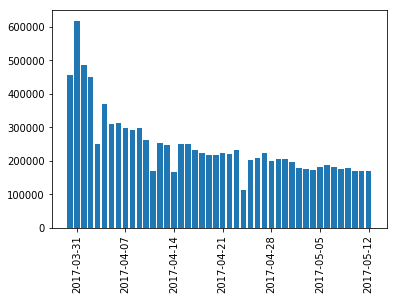

In [16]:
plt.bar(date_play_count.index,date_play_count['count'])
plt.xticks(rotation='vertical')

In [17]:
# count for down by date
date_down_count = df.filter(F.col('event')=='D').groupBy('date').count().toPandas()
date_down_count.set_index('date',inplace=True)

(array([736419., 736426., 736433., 736440., 736447., 736454., 736461.]),
 <a list of 7 Text xticklabel objects>)

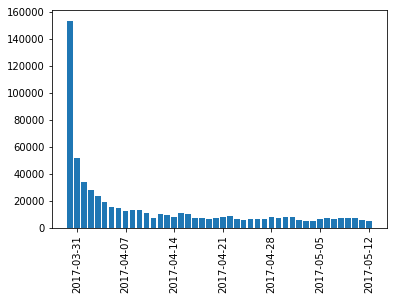

In [18]:
plt.bar(date_down_count.index,date_down_count['count'])
plt.xticks(rotation='vertical')

In [19]:
# count for search by date
date_search_count = df.filter(F.col('event')=='S').groupBy('date').count().toPandas()
date_search_count.set_index('date',inplace=True)

(array([736419., 736426., 736433., 736440., 736447., 736454., 736461.]),
 <a list of 7 Text xticklabel objects>)

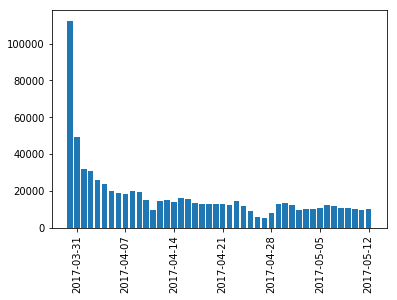

In [20]:
plt.bar(date_search_count.index,date_search_count['count'])
plt.xticks(rotation='vertical')

# Label definition

In [21]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [22]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [23]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [24]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|36235|
|    0|21935|
+-----+-----+



# Feature generation

In [25]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

In [26]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [27]:
# generate event Search, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|167930539|            0|            0|            0|             0|            12|
|167794404|            0|            0|            0|             1|            12|
|168047309|            0|            0|            5|            50|            62|
|167946947|            0|            0|            0|             2|             4|
|   828137|            0|            0|            0|             0|             6|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [28]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))

In [29]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [30]:
from pyspark.sql.functions import datediff, to_date, lit
# defined as days from last event
def days_from_last_event(df,event,last_date):
    df_feature = df\
        .filter(F.col('event')==event)\
        .groupBy('uid')\
        .agg(datediff(to_date(lit(last_date)),
                      to_date(F.max(F.col('date')).alias('last_active_date'))).alias('days_from_last_event'))
    return df_feature

In [31]:
# generate one feature for one type of event
event = 'S'
last_date = label_window_end_date
df_recency_feature = days_from_last_event(df,event,last_date)
df_recency_feature.show(5)

+---------+--------------------+
|      uid|days_from_last_event|
+---------+--------------------+
|167930539|                  34|
|167794404|                  21|
|168047309|                   7|
|167946947|                   2|
|   828137|                  28|
+---------+--------------------+
only showing top 5 rows



In [32]:
# generate recency features for all event_list
event_list = ['P','D','S']
last_date = label_window_end_date
df_recency_list = []
for event in event_list:
    df_recency_list.append(days_from_last_event(df,event,last_date))

In [33]:
df_recency_list

[DataFrame[uid: string, days_from_last_event: int],
 DataFrame[uid: string, days_from_last_event: int],
 DataFrame[uid: string, days_from_last_event: int]]

### Profile features

In [34]:
df_play = spark.read.csv('../data/play_ds.csv',header=True)
df_play.show(5)

+---------+------+-------+----------+---------+-----------+
|      uid|device|song_id|      date|play_time|song_length|
+---------+------+-------+----------+---------+-----------+
|168551430|    ar|1179220|2017-03-30|      231|        231|
|168548942|    ip|4112522|2017-03-30|       26|        331|
|168548099|    ar|4984002|2017-03-30|      210|        210|
|168550576|    ar| 324249|2017-03-30|      235|        235|
|168551383|    ar|7149583|2017-03-30|      214|        215|
+---------+------+-------+----------+---------+-----------+
only showing top 5 rows



In [35]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [36]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    mc|    1|
|    ar|50918|
|    wp|    2|
|    ip| 7103|
+------+-----+



In [37]:
# check if one user has two devices
df_profile_tmp.count()

58024

In [38]:
df_profile_tmp.distinct().count()

58024

In [39]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7103|
|          2|50921|
+-----------+-----+



In [40]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  159|
|          1| 7103|
|          2|50921|
+-----------+-----+



# Form training data

In [41]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [42]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [43]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [44]:
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final.csv',index=False)